In [1]:
import numpy as np
from scipy.sparse.linalg import eigs
from numpy import linalg as LA
from scipy.interpolate import Akima1DInterpolator
from scipy.linalg import expm
import time
from scipy import sparse
import matplotlib.pyplot as plt

np.set_printoptions(precision=16)
start_time = time.time()
# initialize variables
N = 6
# Q is the dimension
Q = pow(2, N)


# decimal number to binary array function
def D2B(num):
    string = f'{num:1b}'
    result = np.zeros(N - len(string), int)

    for ele in string:
        result = np.append(result, int(ele))

    return result


# binary array to decimal function
def B2D(array):
    res = 0
    for ele in array:
        res = (res << 1) | ele
    return res


# start my main function

# initialize J matrix
B = 0
J_matrix = np.zeros((N, N), dtype='float64')

J_matrix = 0.157552*2*3.14*np.array([[0,4.9640,2.6885,1.6748,1.1009,0.7214],[0,0,4.7138,2.7427,1.7331,1.1009],[0,0,0,4.6260,2.7427,1.6748],[0,0,0,0,4.7138,2.6885],[0,0,0,0,0,4.9640],[0,0,0,0,0,0]])
# the line above is to make up the fact that there's a 2pi difference 
J_value = np.max(J_matrix)


In [2]:
# initialize H matrix
H_matrix = np.zeros((Q, Q), dtype='float64')

# start fill in the elements for H matrix by looping all 2^N states

for i in range(Q):
    state = D2B(i)
    spin = D2B(i)  # second copy for the non-diagonal elements to use
    # loop over N sites to change the state vector to either 1 or -1
    for j in range(N):
        # 1 is spin down , 0 is spin up
        if state[j] == 1:
            state[j] = -1
        else:
            state[j] = 1
    # now get the energy, loop all the sites and then pairs
    e_tot = 0
    for j in range(N):
        for q in range(N):
            e_temp = J_matrix[j][q] * state[j] * state[q]
            e_tot = e_tot + e_temp

    H_matrix[i][i] = e_tot

    # start calculating non diagonal elements
    for j in range(N):
        if spin[j] == 1:
            # if it's spin down, raise to spin up
            spin[j] = 0
            new_num = B2D(spin)
            H_matrix[i][new_num] = B
            # change it back for next operation
            spin[j] = 1
        else:
            # if it's spin down, raise to spin up
            spin[j] = 1
            new_num = B2D(spin)
            H_matrix[i][new_num] = B
            # change it back for next operation
            spin[j] = 0

# print(H_matrix)
# compute full eigenvalues and eigenvector

In [3]:
# get true ground state 
w, v = LA.eigh(H_matrix)
inx = np.argsort(w)
true_gs_vec = (v[:, inx[0]]+v[:, inx[1]])/np.sqrt(2) # COULD BE PLUS OR MINUS, DEPENDING ON PARITY, NEED TO BE CHANGED

In [4]:
time_list = 0.6667*np.array([5.1327962022555298e-05, 1.0294852573928062e-04,
       1.5486418779158220e-04, 2.0707747318558388e-04,
       2.5959093569464240e-04, 3.1240715826871552e-04,
       3.6552875345071794e-04, 4.1895836380000622e-04,
       4.7269866232313337e-04, 5.2675235291201939e-04,
       5.8112217078968632e-04, 6.3581088296371104e-04,
       6.9082128868755172e-04, 7.4615621992990587e-04,
       8.0181854185226514e-04, 8.5781115329483266e-04,
       9.1413698727097392e-04, 9.7079901147037679e-04,
       1.0278002287710988e-03, 1.0851436777606855e-03,
       1.1428324332665466e-03, 1.2008696068957830e-03,
       1.2592583475846595e-03, 1.3180018421579268e-03,
       1.3771033158981954e-03, 1.4365660331255763e-03,
       1.4963932977878004e-03, 1.5565884540610405e-03,
       1.6171548869616608e-03, 1.6780960229691273e-03,
       1.7394153306603149e-03, 1.8011163213554561e-03,
       1.8632025497759810e-03, 1.9256776147144976e-03,
       1.9885451597171887e-03, 2.0518088737788744e-03,
       2.1154724920510312e-03, 2.1795397965630407e-03,
       2.2440146169569572e-03, 2.3089008312360939e-03,
       2.3742023665277233e-03, 2.4399231998602144e-03,
       2.5060673589549125e-03, 2.5726389230330952e-03,
       2.6396420236383393e-03, 2.7070808454746397e-03,
       2.7749596272606332e-03, 2.8432826626002905e-03,
       2.9120543008704413e-03, 2.9812789481255208e-03,
       3.0509610680199187e-03, 3.1211051827483346e-03,
       3.1917158740045505e-03, 3.2627977839590418e-03,
       3.3343556162558530e-03, 3.4063941370291893e-03,
       3.4789181759401744e-03, 3.5519326272342401e-03,
       3.6254424508196294e-03, 3.6994526733675082e-03,
       3.7739683894341767e-03, 3.8489947626059247e-03,
       3.9245370266670319e-03, 4.0006004867914830e-03,
       4.0771905207589556e-03, 4.1543125801956435e-03,
       4.2319721918405275e-03, 4.3101749588376854e-03,
       4.3889265620552804e-03, 4.4682327614318576e-03,
       4.5480993973506176e-03, 4.6285323920423416e-03,
       4.7095377510176662e-03, 4.7911215645294221e-03,
       4.8732900090657782e-03, 4.9560493488749417e-03,
       5.0394059375221973e-03, 5.1233662194800859e-03,
       5.2079367317525403e-03, 5.2931241055338297e-03,
       5.3789350679031879e-03, 5.4653764435560010e-03,
       5.5524551565725036e-03, 5.6401782322249069e-03,
       5.7285527988239484e-03, 5.8175860896058579e-03,
       5.9072854446607787e-03, 5.9976583129037015e-03,
       6.0887122540890098e-03, 6.1804549408697538e-03,
       6.2728941609028251e-03, 6.3660378190012129e-03,
       6.4598939393345793e-03, 6.5544706676794167e-03,
       6.6497762737200870e-03, 6.7458191534020941e-03,
       6.8426078313389635e-03, 6.9401509632741618e-03,
       7.0384573385995196e-03, 7.1375358829316744e-03,
       7.2373956607480897e-03, 7.3380458780842664e-03,
       7.4394958852937862e-03, 7.5417551798729193e-03,
       7.6448334093515372e-03, 7.7487403742521653e-03,
       7.8534860311190273e-03, 7.9590804956190392e-03,
       8.0655340457167230e-03, 8.1728571249251158e-03,
       8.2810603456347880e-03, 8.3901544925231511e-03,
       8.5001505260463451e-03, 8.6110595860159969e-03,
       8.7228929952632966e-03, 8.8356622633928555e-03,
       8.9493790906289197e-03, 9.0640553717565939e-03,
       9.1797032001608089e-03, 9.2963348719658622e-03,
       9.4139628902784756e-03, 9.5325999695373299e-03,
       9.6522590399722823e-03, 9.7729532521764178e-03,
       9.8946959817943110e-03, 1.0017500834329923e-02,
       1.0141381650077715e-02, 1.0266352509180645e-02,
       1.0392427736818855e-02, 1.0519621908533037e-02,
       1.0647949855686477e-02, 1.0777426671070064e-02,
       1.0908067714654600e-02, 1.1039888619494917e-02,
       1.1172905297790518e-02, 1.1307133947107535e-02,
       1.1442591056767055e-02, 1.1579293414404973e-02,
       1.1717258112708779e-02, 1.1856502556336829e-02,
       1.1997044469025855e-02, 1.2138901900892746e-02,
       1.2282093235936715e-02, 1.2426637199748344e-02,
       1.2572552867432116e-02, 1.2719859671749382e-02,
       1.2868577411488853e-02, 1.3018726260072104e-02,
       1.3170326774401758e-02, 1.3323399903960326e-02,
       1.3477967000168026e-02, 1.3634049826008150e-02,
       1.3791670565928928e-02, 1.3950851836031151e-02,
       1.4111616694551170e-02, 1.4273988652649283e-02,
       1.4437991685513893e-02, 1.4603650243792185e-02,
       1.4770989265358598e-02, 1.4940034187432692e-02,
       1.5110810959058500e-02, 1.5283346053958017e-02,
       1.5457666483771880e-02, 1.5633799811700821e-02,
       1.5811774166562112e-02, 1.5991618257275707e-02,
       1.6173361387795394e-02, 1.6357033472500965e-02,
       1.6542665052067959e-02, 1.6730287309832316e-02,
       1.6919932088667940e-02, 1.7111631908395937e-02,
       1.7305419983745074e-02, 1.7501330242883844e-02,
       1.7699397346545354e-02, 1.7899656707767175e-02,
       1.8102144512269248e-02, 1.8306897739493910e-02,
       1.8513954184333149e-02, 1.8723352479569282e-02,
       1.8935132119056446e-02, 1.9149333481671374e-02,
       1.9365997856063317e-02, 1.9585167466234215e-02,
       1.9806885497981628e-02, 2.0031196126238372e-02,
       2.0258144543344427e-02, 2.0487776988288131e-02,
       2.0720140776955519e-02, 2.0955284333428373e-02,
       2.1193257222373387e-02, 2.1434110182566905e-02,
       2.1677895161601641e-02, 2.1924665351824125e-02,
       2.2174475227553718e-02, 2.2427380583636625e-02,
       2.2683438575390773e-02, 2.2942707760000115e-02,
       2.3205248139419803e-02, 2.3471121204856567e-02,
       2.3740389982891841e-02, 2.4013119083318452e-02,
       2.4289374748765177e-02, 2.4569224906187223e-02,
       2.4852739220304492e-02, 2.5139989149073682e-02,
       2.5431048001284578e-02, 2.5725990996375500e-02,
       2.6024895326567755e-02, 2.6327840221424002e-02,
       2.6634907014941013e-02, 2.6946179215292902e-02,
       2.7261742577347141e-02, 2.7581685178082019e-02,
       2.7906097495041110e-02, 2.8235072487967545e-02,
       2.8568705683768528e-02, 2.8907095264968773e-02,
       2.9250342161820087e-02, 2.9598550148243551e-02,
       2.9951825941790553e-02, 3.0310279307819175e-02,
       3.0674023168093489e-02, 3.1043173714025065e-02,
       3.1417850524788349e-02, 3.1798176690554861e-02,
       3.2184278941105260e-02, 3.2576287780093229e-02,
       3.2974337625251343e-02, 3.3378566954845812e-02,
       3.3789118460705439e-02, 3.4206139208169291e-02,
       3.4629780803318390e-02, 3.5060199567878855e-02,
       3.5497556722207224e-02, 3.5942018576794285e-02,
       3.6393756732750325e-02, 3.6852948291763790e-02,
       3.7319776076056028e-02, 3.7794428858887820e-02,
       3.8277101606208910e-02, 3.8767995730079531e-02,
       3.9267319354533502e-02, 3.9775287594596330e-02,
       4.0292122849218397e-02, 4.0818055108933535e-02,
       4.1353322279107534e-02, 4.1898170519699046e-02,
       4.2452854602517902e-02, 4.3017638287033241e-02,
       4.3592794715855976e-02, 4.4178606831098713e-02,
       4.4775367812899897e-02, 4.5383381541490214e-02,
       4.6002963084277086e-02, 4.6634439209529074e-02,
       4.7278148928356675e-02, 4.7934444066809606e-02,
       4.8603689870044958e-02, 4.9286265640665516e-02,
       4.9982565413485211e-02, 5.0692998669148906e-02,
       5.1417991089219406e-02, 5.2157985355545181e-02,
       5.2913441996941118e-02, 5.3684840286452415e-02,
       5.4472679192730258e-02, 5.5277478389329698e-02,
       5.6099779326047497e-02, 5.6940146366752625e-02,
       5.7799167998527926e-02, 5.8677458117341194e-02,
       5.9575657395900865e-02, 6.0494434739830044e-02,
       6.1434488838816088e-02, 6.2396549819967811e-02,
       6.3381381011242161e-02, 6.4389780823494447e-02,
       6.5422584760466890e-02, 6.6480667566867019e-02,
       6.7564945525609627e-02, 6.8676378916310940e-02,
       6.9815974648245696e-02, 7.0984789082214977e-02,
       7.2183931057141631e-02, 7.3414565138724686e-02,
       7.4677915109162302e-02, 7.5975267718813466e-02,
       7.7307976722734678e-02, 7.8677467227324355e-02,
       8.0085240374862310e-02, 8.1532878396577441e-02,
       8.3022050068051634e-02, 8.4554516604310723e-02,
       8.6132138035915878e-02, 8.7756880111802632e-02,
       8.9430821779584141e-02, 9.1156163299611348e-02,
       9.2935235055347121e-02, 9.4770507129659926e-02,
       9.6664599724581496e-02, 9.8620294511030188e-02,
       1.0064054700511763e-01, 1.0272850007910171e-01,
       1.0488749872801305e-01, 1.0712110622768907e-01,
       1.0943312183666083e-01, 1.1182760021334918e-01,
       1.1430887274169373e-01, 1.1688157098306522e-01,
       1.1955065250057721e-01, 1.2232142933427313e-01,
       1.2519959944277054e-01, 1.2819128146956180e-01,
       1.3130305324119537e-01, 1.3454199446104656e-01,
       1.3791573412757616e-01, 1.4143250328132675e-01,
       1.4510119377214456e-01, 1.4893142383927707e-01,
       1.5293361141447973e-01, 1.5711905619491709e-01,
       1.6150003169181579e-01, 1.6608988864648974e-01,
       1.7090317142220293e-01, 1.7595574923389115e-01,
       1.8126496437455589e-01, 1.8684979994483233e-01,
       1.9273106999979492e-01, 1.9893163550495471e-01,
       2.0547665005371643e-01, 2.1239383995516112e-01,
       2.1971382406955378e-01, 2.2747047966677489e-01,
       2.3570136162856917e-01, 2.4444818352818076e-01,
       2.5375737051858244e-01, 2.6368069555729262e-01,
       2.7427601229756510e-01, 2.8560809997276271e-01,
       2.9774963775600904e-01, 3.1078232830847541e-01,
       3.2479819238146990e-01, 3.3990105813888771e-01,
       3.5620826986729948e-01, 3.7385264021702247e-01,
       3.9298466693336920e-01, 4.1377502744909045e-01,
       4.3641735009223270e-01, 4.6113123515177101e-01,
       4.8816545708299297e-01, 5.1780121300622795e-01,
       5.5035518210919654e-01, 5.8618201293885586e-01,
       6.2567564706902945e-01, 6.6926860709972258e-01,
       7.1742802417205198e-01, 7.7064678147859544e-01,
       8.2942778359065472e-01, 8.9425918975345386e-01,
       9.6557874986412162e-01, 1.0437265387220429e+00,
       1.1288877848533294e+00, 1.2210312619921979e+00,
       1.3198533049086150e+00, 1.4247413421343771e+00,
       1.5347714502868808e+00, 1.6487496332018943e+00,
       1.7652962365261402e+00, 1.8829603766880307e+00,
       2.0003420069412261e+00, 2.1161977505509948e+00,
       2.2295133195387744e+00, 2.3395364320152168e+00,
       2.4457744680240197e+00, 2.5479672157399289e+00,
       2.6460464052201265e+00, 2.7400917805151872e+00,
       2.8302901972820371e+00, 2.9169011061942687e+00,
       3.0002294692810603e+00, 3.0806057543200036e+00,
       3.1583719766403138e+00, 3.2338725565262578e+00,
       3.3074488206642920e+00, 3.3794361520250100e+00,
       3.4501629986204261e+00, 3.5199511442984788e+00,
       3.5891168060730618e+00, 3.6579722476921264e+00])

In [5]:
B_list = 2*3.14*np.array([3.899999999999961 , 3.889974293059087 , 3.879948586118213 ,
       3.869922879177339 , 3.859897172236465 , 3.8498714652955908,
       3.839845758354717 , 3.829820051413843 , 3.819794344472969 ,
       3.809768637532095 , 3.799742930591221 , 3.7897172236503476,
       3.7796915167094736, 3.7696658097685996, 3.7596401028277255,
       3.7496143958868515, 3.7395886889459775, 3.729562982005104 ,
       3.71953727506423  , 3.709511568123356 , 3.699485861182482 ,
       3.689460154241608 , 3.679434447300734 , 3.6694087403598603,
       3.6593830334189863, 3.6493573264781123, 3.6393316195372383,
       3.6293059125963643, 3.6192802056554907, 3.6092544987146167,
       3.5992287917737427, 3.5892030848328687, 3.5791773778919946,
       3.5691516709511206, 3.559125964010247 , 3.549100257069373 ,
       3.539074550128499 , 3.529048843187625 , 3.519023136246751 ,
       3.508997429305877 , 3.4989717223650034, 3.4889460154241294,
       3.4789203084832554, 3.4688946015423814, 3.4588688946015074,
       3.448843187660634 , 3.43881748071976  , 3.4287917737788858,
       3.4187660668380118, 3.4087403598971378, 3.3987146529562637,
       3.38868894601539  , 3.378663239074516 , 3.368637532133642 ,
       3.358611825192768 , 3.348586118251894 , 3.33856041131102  ,
       3.3285347043701465, 3.3185089974292725, 3.3084832904883985,
       3.2984575835475245, 3.2884318766066505, 3.278406169665777 ,
       3.268380462724903 , 3.258354755784029 , 3.248329048843155 ,
       3.238303341902281 , 3.228277634961407 , 3.2182519280205333,
       3.2082262210796593, 3.1982005141387853, 3.1881748071979112,
       3.1781491002570372, 3.168123393316163 , 3.1580976863752896,
       3.1480719794344156, 3.1380462724935416, 3.1280205655526676,
       3.1179948586117936, 3.10796915167092  , 3.097943444730046 ,
       3.087917737789172 , 3.077892030848298 , 3.067866323907424 ,
       3.05784061696655  , 3.0478149100256764, 3.0377892030848024,
       3.0277634961439284, 3.0177377892030544, 3.0077120822621803,
       2.9976863753213063, 2.9876606683804328, 2.9776349614395587,
       2.9676092544986847, 2.9575835475578107, 2.9475578406169367,
       2.9375321336760627, 2.927506426735189 , 2.917480719794315 ,
       2.907455012853441 , 2.897429305912567 , 2.887403598971693 ,
       2.8773778920308195, 2.8673521850899455, 2.8573264781490715,
       2.8473007712081975, 2.8372750642673235, 2.8272493573264494,
       2.817223650385576 , 2.807197943444702 , 2.797172236503828 ,
       2.787146529562954 , 2.77712082262208  , 2.767095115681206 ,
       2.7570694087403322, 2.7470437017994582, 2.737017994858584 ,
       2.72699228791771  , 2.716966580976836 , 2.7069408740359626,
       2.6969151670950886, 2.6868894601542146, 2.6768637532133406,
       2.6668380462724666, 2.6568123393315926, 2.646786632390719 ,
       2.636760925449845 , 2.626735218508971 , 2.616709511568097 ,
       2.606683804627223 , 2.596658097686349 , 2.5866323907454754,
       2.5766066838046013, 2.5665809768637273, 2.5565552699228533,
       2.5465295629819793, 2.5365038560411057, 2.5264781491002317,
       2.5164524421593577, 2.5064267352184837, 2.4964010282776097,
       2.4863753213367357, 2.476349614395862 , 2.466323907454988 ,
       2.456298200514114 , 2.44627249357324  , 2.436246786632366 ,
       2.426221079691492 , 2.4161953727506185, 2.4061696658097445,
       2.3961439588688704, 2.3861182519279964, 2.3760925449871224,
       2.366066838046249 , 2.356041131105375 , 2.346015424164501 ,
       2.335989717223627 , 2.325964010282753 , 2.315938303341879 ,
       2.305912596401005 , 2.295886889460131 , 2.285861182519257 ,
       2.275835475578383 , 2.265809768637509 , 2.255784061696635 ,
       2.2457583547557616, 2.2357326478148876, 2.2257069408740136,
       2.2156812339331395, 2.2056555269922655, 2.195629820051392 ,
       2.185604113110518 , 2.175578406169644 , 2.16555269922877  ,
       2.155526992287896 , 2.145501285347022 , 2.1354755784061483,
       2.1254498714652743, 2.1154241645244003, 2.1053984575835263,
       2.0953727506426523, 2.0853470437017783, 2.0753213367609047,
       2.0652956298200307, 2.0552699228791567, 2.0452442159382827,
       2.0352185089974086, 2.0251928020565346, 2.015167095115661 ,
       2.005141388174787 , 1.995115681233913 , 1.9850899742930388,
       1.9750642673521652, 1.9650385604112912, 1.9550128534704172,
       1.9449871465295434, 1.9349614395886694, 1.9249357326477954,
       1.9149100257069216, 1.9048843187660476, 1.8948586118251738,
       1.8848329048842998, 1.8748071979434258, 1.864781491002552 ,
       1.854755784061678 , 1.844730077120804 , 1.8347043701799302,
       1.8246786632390561, 1.8146529562981821, 1.8046272493573083,
       1.7946015424164343, 1.7845758354755603, 1.7745501285346865,
       1.7645244215938125, 1.7544987146529385, 1.7444730077120647,
       1.7344473007711907, 1.724421593830317 , 1.7143958868894429,
       1.7043701799485689, 1.694344473007695 , 1.684318766066821 ,
       1.674293059125947 , 1.6642673521850733, 1.6542416452441993,
       1.6442159383033252, 1.6341902313624515, 1.6241645244215774,
       1.6141388174807034, 1.6041131105398296, 1.5940874035989556,
       1.5840616966580816, 1.5740359897172078, 1.5640102827763338,
       1.55398457583546  , 1.543958868894586 , 1.533933161953712 ,
       1.5239074550128382, 1.5138817480719642, 1.5038560411310902,
       1.4938303341902164, 1.4838046272493424, 1.4737789203084684,
       1.4637532133675946, 1.4537275064267206, 1.4437017994858465,
       1.4336760925449727, 1.4236503856040987, 1.4136246786632247,
       1.403598971722351 , 1.393573264781477 , 1.383547557840603 ,
       1.3735218508997291, 1.363496143958855 , 1.3534704370179813,
       1.3434447300771073, 1.3334190231362333, 1.3233933161953595,
       1.3133676092544855, 1.3033419023136115, 1.2933161953727377,
       1.2832904884318637, 1.2732647814909896, 1.2632390745501159,
       1.2532133676092418, 1.2431876606683678, 1.233161953727494 ,
       1.22313624678662  , 1.213110539845746 , 1.2030848329048722,
       1.1930591259639982, 1.1830334190231244, 1.1730077120822504,
       1.1629820051413764, 1.1529562982005026, 1.1429305912596286,
       1.1329048843187546, 1.1228791773778808, 1.1128534704370068,
       1.1028277634961328, 1.092802056555259 , 1.082776349614385 ,
       1.072750642673511 , 1.0627249357326372, 1.0526992287917631,
       1.0426735218508891, 1.0326478149100153, 1.0226221079691413,
       1.0125964010282673, 1.0025706940873935, 0.9925449871465194,
       0.9825192802056456, 0.9724935732647717, 0.9624678663238977,
       0.9524421593830238, 0.9424164524421499, 0.932390745501276 ,
       0.922365038560402 , 0.9123393316195281, 0.9023136246786542,
       0.8922879177377802, 0.8822622107969063, 0.8722365038560324,
       0.8622107969151585, 0.8521850899742844, 0.8421593830334105,
       0.8321336760925366, 0.8221079691516626, 0.8120822622107887,
       0.8020565552699148, 0.7920308483290408, 0.7820051413881669,
       0.771979434447293 , 0.7619537275064191, 0.7519280205655451,
       0.7419023136246712, 0.7318766066837973, 0.7218508997429233,
       0.7118251928020494, 0.7017994858611755, 0.6917737789203015,
       0.6817480719794276, 0.6717223650385536, 0.6616966580976797,
       0.6516709511568057, 0.6416452442159318, 0.6316195372750579,
       0.6215938303341839, 0.61156812339331  , 0.6015424164524361,
       0.5915167095115622, 0.5814910025706882, 0.5714652956298143,
       0.5614395886889404, 0.5514138817480664, 0.5413881748071925,
       0.5313624678663186, 0.5213367609254446, 0.5113110539845707,
       0.5012853470436968, 0.4912596401028228, 0.4812339331619488,
       0.4712082262210749, 0.461182519280201 , 0.4511568123393271,
       0.4411311053984531, 0.4311053984575792, 0.4210796915167053,
       0.4110539845758313, 0.4010282776349574, 0.3910025706940835,
       0.3809768637532095, 0.3709511568123356, 0.3609254498714616,
       0.3508997429305877, 0.3408740359897138, 0.3308483290488399,
       0.3208226221079659, 0.310796915167092 , 0.3007712082262181,
       0.2907455012853441, 0.2807197943444702, 0.2706940874035962,
       0.2606683804627223, 0.2506426735218484, 0.2406169665809744,
       0.2305912596401005, 0.2205655526992266, 0.2105398457583526,
       0.2005141388174787, 0.1904884318766048, 0.1804627249357308,
       0.1704370179948569, 0.160411311053983 , 0.150385604113109 ,
       0.1403598971722351, 0.1303341902313611, 0.1203084832904872,
       0.1102827763496133, 0.1002570694087394, 0.0902313624678654,
       0.0802056555269915, 0.0701799485861175, 0.0601542416452436,
       0.0501285347043697, 0.0401028277634957, 0.0300771208226218,
       0.0200514138817479, 0.0100257069408739, 0.                ])

In [6]:
# turn B into a function of t, so that we can just change B later but not t 
bi = Akima1DInterpolator(time_list, B_list)
t_data_smooth = np.linspace(min(time_list), max(time_list), 2000)
B_data_smooth = bi(t_data_smooth)
dt = t_data_smooth[1]-t_data_smooth[0]
print('dt = ',dt)

dt =  0.0012199779275558081


In [7]:
#t_data_smooth

In [8]:
# repeat H matrix constrcution again to get H matrix with non zero B field, 
# cannnot use H_matrix[H_matrix == B] = B-dB because we will destory other zero elements 
B_big = 3e+20
B = B_big #1/2, which is corresponding to the 1/2 in the equation from sigma x to sigma + and - 
print(B)
for i in range(Q):
    state = D2B(i)
    spin = D2B(i)  # second copy for the non-diagonal elements to use
    # loop over N sites to change the state vector to either 1 or -1
    for j in range(N):
        # 1 is spin down , 0 is spin up
        if state[j] == 1:
            state[j] = -1
        else:
            state[j] = 1
    # now get the energy, loop all the sites and then pairs
    e_tot = 0
    for j in range(N):
        for q in range(N):
            e_temp = J_matrix[j][q] * state[j] * state[q]
            e_tot = e_tot + e_temp

    H_matrix[i][i] = e_tot

    # start calculating non diagonal elements
    for j in range(N):
        if spin[j] == 1:
            # if it's spin down, raise to spin up
            spin[j] = 0
            new_num = B2D(spin)
            H_matrix[i][new_num] = B
            # change it back for next operation
            spin[j] = 1
        else:
            # if it's spin down, raise to spin up
            spin[j] = 1
            new_num = B2D(spin)
            H_matrix[i][new_num] = B
            # change it back for next operation
            spin[j] = 0


3e+20


In [9]:
# get  ground state with numerically infinite large B field
w, v = LA.eigh(H_matrix)
inx = np.argsort(w)
temp_vec = v[:, inx[0]] # the index here could be zero or one, depending on the parity
# but if the wrong index will always give roughly zero fidelity 

In [10]:
# get fidelity for t= 0s
fidelity_list=[]
fidelity = pow(np.dot(true_gs_vec,temp_vec),2)
fidelity_list.append(fidelity.real)
print(fidelity_list)

[0.03125000000000009]


In [11]:
# try exp ramp 

def exp_func (time):
    B_not = J_value*5
    tau = np.max(time_list)/6
    result = B_not* np.exp(-time/tau)
    #result = B_not* (1 - time/np.max(time_list))

    return result 

In [12]:
# change infinite large B field back to first B list element 
H_matrix[H_matrix == B_big] = B_data_smooth[0] 
#H_matrix[H_matrix == B_big] = exp_func(0)

In [13]:
# time evolution
step = len(t_data_smooth)
B_ini = B_data_smooth[0] * dt * -1j
#B_ini = exp_func(0) * dt * -1j
imgH_matrix = H_matrix * dt * -1j
p = temp_vec  # p stand for product
# loop each time step
for i in range(1, step):
    exp_imgH_matrix = expm(imgH_matrix)
    new_p = np.dot(exp_imgH_matrix,p)
    #new_p = np.dot(p,expm(imgH_matrix))
    # calculate fieldlity 
    #print(np.linalg.norm(new_p))
    dp = np.dot(true_gs_vec,new_p) # dp is dot product
    #print(dp)
    dp_cc = np.conjugate(dp)     # the complex conjucate of the dot product 
    fidelity = (dp*dp_cc).real
    fidelity_list.append(fidelity)
    
    
    # update imgH_matrix for next time evolution
    B_new = B_data_smooth[i] * dt * -1j
    #B_new = exp_func(i*dt) * dt * -1j
    #print(i*dt)
    imgH_matrix[imgH_matrix == B_ini] = B_new
    B_ini = B_new
    
    p = new_p




print("My program took", time.time() - start_time, "to run")


My program took 1.9262750148773193 to run


Text(0.5, 1.0, 'N = 6 , AFM, $J_{0}$ = 0.77 , Long Range with α =1, ramp time =2.4ms ')

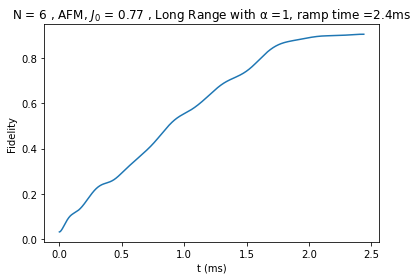

In [14]:
fidelity_list = np.array(fidelity_list)
plt.plot(t_data_smooth,fidelity_list)
#plt.xlabel('t / $J_{0}$')
plt.xlabel('t (ms)')
plt.ylabel('Fidelity')
#plt.xlim(0,2.4)
#plt.ylim(0,0.9)
plt.title('N = 6 , AFM, $J_{0}$ = 0.77 , Long Range with α =1, ramp time =2.4ms ')

In [15]:
np.max(fidelity_list)

0.905251685277739

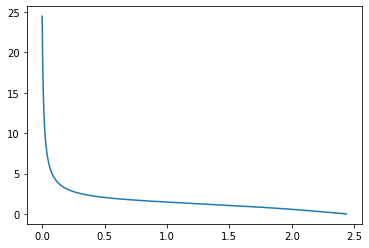

In [16]:
plt.plot(t_data_smooth,B_data_smooth)

In [17]:
decay_fidelity_list = np.zeros(len(fidelity_list))
for i in range (len(t_data_smooth)):
    decay = np.exp(-t_data_smooth[i]/16.50) # 16.50 is the t_d value decoherence time from experiment
    decay_fidelity_list[i] = fidelity_list[i] * decay

Text(0, 0.5, 'Fidelity')

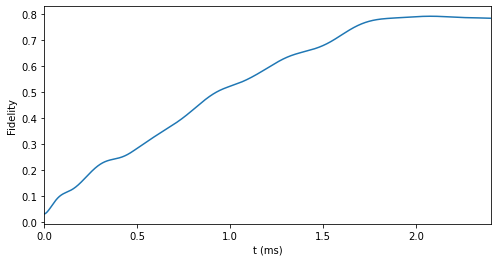

In [18]:
plt.figure(figsize=(8,4))
plt.plot(t_data_smooth,decay_fidelity_list)
plt.xlabel('t (ms)')
plt.xlim(0,2.4)
plt.ylabel('Fidelity')